In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import keras

LOAD AND EXPLORE THE DATASET

In [60]:
# load the dataset

df = keras.datasets.fashion_mnist.load_data()
print(df)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [61]:
# Print dataset shapes

# Tuple of NumPy arrays
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"Training images shape: {X_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Training labels: {np.unique(y_train)}")
print(f"Test labels: {np.unique(y_test)}")


Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Training labels: [0 1 2 3 4 5 6 7 8 9]
Test labels: [0 1 2 3 4 5 6 7 8 9]


In [62]:
# Class names in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


DATA PREPROCESSING

In [24]:
# Normalize the pixel values to a range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
# Reshape data to fit the model (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [29]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

VISUALIZATIONS

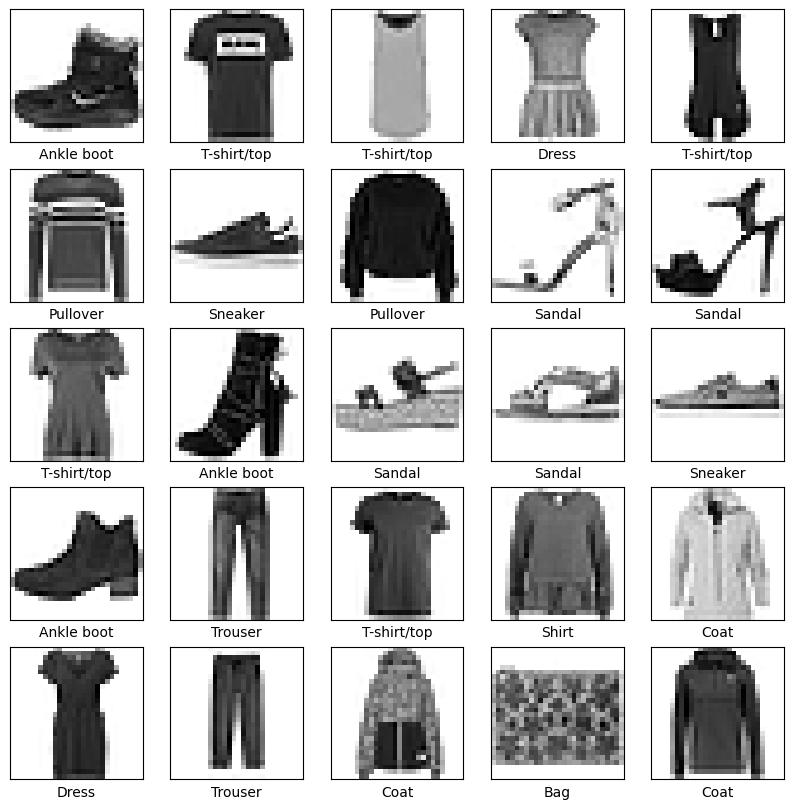

In [31]:
# Display sample images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

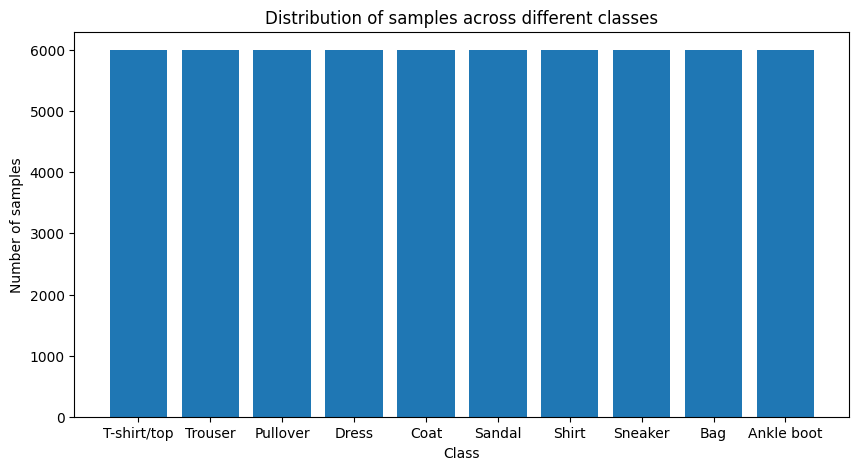

In [37]:
# Bar chart showing the distribution of samples across different classes
class_counts = np.argmax(y_train, axis=1)
plt.figure(figsize=(10, 5))
plt.bar(class_names, np.bincount(class_counts))
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Distribution of samples across different classes')
plt.show()


the dataset is well-balanced, as each class has approximately 6000 samples. It shows equal distribution of all classess on the dataset

BUILD AN ANN

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Build the ANN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_4 (Dropout)         (None, 2304)             

This Neural Network model built for the Fashion MNIST dataset, contains 28x28 pixel grayscale images. It starts with an input layer followed by two convolutional layers with ReLU activation functions.

Next, there are two max-pooling layers of same size. After pooling, the output is flattened into a 1D vector of 2304 elements. A dropout layer is added to prevent overfitting by dropping 50% of its units during training.

The model then has a fully connected layer with 128 neurons using ReLU activation, followed by 10 neurons using the softmax activation function to provide class probabilities.

The model contains 315,146 trainable parameters, making it effective for classifying the 10 categories in the Fashion MNIST dataset. This setup uses convolutional layers for feature extraction, max-pooling for dimensionality reduction, dropout to prevent overfitting, and dense layers for classification.

COMPILE THE MODEL

In [63]:
# Compile the model using an appropriate loss function, optimizer, and evaluation metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


TRAIN THE MODEL

In [42]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
1500/1500 [==============================] - 137s 91ms/step - loss: 0.4807 - accuracy: 0.8270 - val_loss: 0.3431 - val_accuracy: 0.8798
Epoch 2/10
1500/1500 [==============================] - 144s 96ms/step - loss: 0.3305 - accuracy: 0.8772 - val_loss: 0.2897 - val_accuracy: 0.8924
Epoch 3/10
1500/1500 [==============================] - 146s 97ms/step - loss: 0.2839 - accuracy: 0.8930 - val_loss: 0.2516 - val_accuracy: 0.9072
Epoch 4/10
1500/1500 [==============================] - 124s 83ms/step - loss: 0.2580 - accuracy: 0.9030 - val_loss: 0.2332 - val_accuracy: 0.9116
Epoch 5/10
1500/1500 [==============================] - 127s 85ms/step - loss: 0.2356 - accuracy: 0.9116 - val_loss: 0.2272 - val_accuracy: 0.9181
Epoch 6/10
1500/1500 [==============================] - 124s 83ms/step - loss: 0.2195 - accuracy: 0.9173 - val_loss: 0.2245 - val_accuracy: 0.9203
Epoch 7/10
1500/1500 [==============================] - 124s 82ms/step - loss: 0.2093 - accuracy: 0.9222 - val_loss: 0

EVALUATE THE MODEL

In [58]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Validation accuracy: {val_acc}")
print(f"Validation loss: {val_loss}")

313/313 - 6s - loss: 0.2199 - accuracy: 0.9209 - 6s/epoch - 20ms/step
Validation accuracy: 0.9208999872207642
Validation loss: 0.21987952291965485


The validation accuracy of the model is approximately 92.09%. This means that out of all the samples in the validation set, the model correctly classified about 92.09% of them.
The validation loss is 0.2199, indicating the degree to which the model's predictions differ from the actual labels. Since lower values indicate better performance, a loss of 0.2199 is considered good.

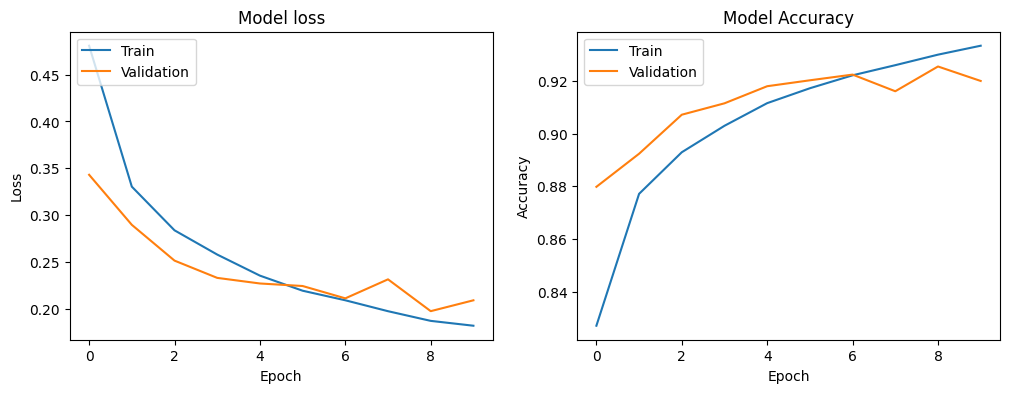

In [44]:
# Visualize training & validation history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Accuracy')
plt.show()

Loss: The training loss decreases, indicating that the model is learning and improving its performance on the training data. The validation loss also decreases initially, suggesting that the model is improving on the validation data. However, it starts to fluctuate after around 5 epochs, indicating potential overfitting where the model starts to perform well on the training data but not as consistently on unseen data.

Accuracy: The training accuracy increases consistently, showing that the model is becoming more accurate on the training dataset. The validation accuracy also increases initially but then fluctuates slightly which again might indicate some overfitting. But generally follows the trend of the training accuracy.

TEST SET PREDICTION

313/313 [==============================] - 8s 27ms/step


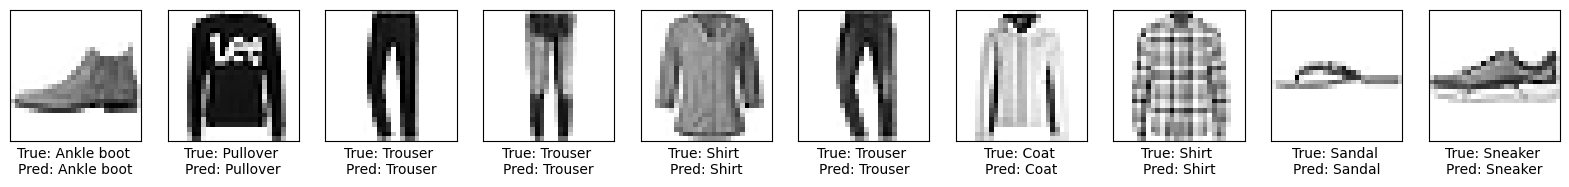

In [54]:
# Predict on the test set
predictions = model.predict(X_test)

# Display a few sample predictions
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[np.argmax(y_test[i])]} \nPred: {class_names[np.argmax(predictions[i])]}")
plt.show()


The image provide some examples items from the Fashion MNIST dataset, where both the true labels and the predicted labels are classified correctly. The model has performed well on these samples, correctly identifying each item. This indicates that the model is capable of distinguishing between various classes of fashion items with high accuracy for these examples.